# Covid-19 total cases prediction
## By Radin Shayanfar - 9731032

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def add_features(X, poly_degree):
    ret = np.ones((X.shape[0], 1))
    for pow in range(1, poly_degree + 1):
        ret = np.concatenate((ret, np.power(X, pow)), axis=1)
    return ret

def predict(theta, x):
    X = add_features(x, poly_degree=2)
    return X.dot(theta)

def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

### Reading CSV file as Pandas DataFrame:

In [3]:
cv_data = pd.read_csv('total_cases.csv')[['World']]

# cv_data = cv_data[['World']]
cv_data.rename(columns={'World': 'y'}, inplace=True)

# cv_data.insert(0, '0', 1)
cv_data.insert(0, 'x', range(1, len(cv_data) + 1))
# cv_data.insert(2, '2', cv_data['1'] ** 2)

In [4]:
cv_data

,x,y
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44
...,...,...
145,146,5276942
146,147,5371158
147,148,5460254
148,149,5556130


### Splitting train and test sets:

In [5]:
np_array = cv_data.to_numpy()

In [6]:
train_X = add_features(np_array[:-7, 0][..., np.newaxis], poly_degree=2)
train_Y = np_array[:-7, -1][..., np.newaxis]
test_X = np_array[-7:, 0][..., np.newaxis]
test_Y = np_array[-7:, -1][..., np.newaxis]

### The polynomial coefficients ($\theta$ array) are:
&emsp; $a_{0}$ = 4.992e+05 <br>
&emsp; $a_{1}$ = -3.775e+04 <br>
&emsp; $a_{2}$ = 4.801e+02 <br>

In [7]:
theta = normal_equation(train_X, train_Y)
theta

array([[ 4.99203886e+05],
       [-3.77571866e+04],
       [ 4.80176507e+02]])

### Predicted and actual values of last 7 days:

In [8]:
last_7_days = np.concatenate((test_X, predict(theta, test_X), test_Y), axis=1)
last_7_days_df = pd.DataFrame(data=last_7_days, columns=[
    'Day', 'Predicted Value', 'Actual Value'
])
last_7_days_df['Squared Predict Error'] = (last_7_days_df['Predicted Value'] - last_7_days_df['Actual Value']) ** 2
last_7_days_df

,Day,Predicted Value,Actual Value,Squared Predict Error
0,144.0,5.019109e+06,5069262.0,2.515317e+09
1,145.0,5.120123e+06,5175836.0,3.103951e+09
2,146.0,5.222097e+06,5276942.0,3.007967e+09
3,147.0,5.325032e+06,5371158.0,2.127645e+09
4,148.0,5.428926e+06,5460254.0,9.814135e+08
5,149.0,5.533782e+06,5556130.0,4.994458e+08
6,150.0,5.639597e+06,5656615.0,2.896019e+08


### Plotted data:

<Figure size 432x288 with 0 Axes>

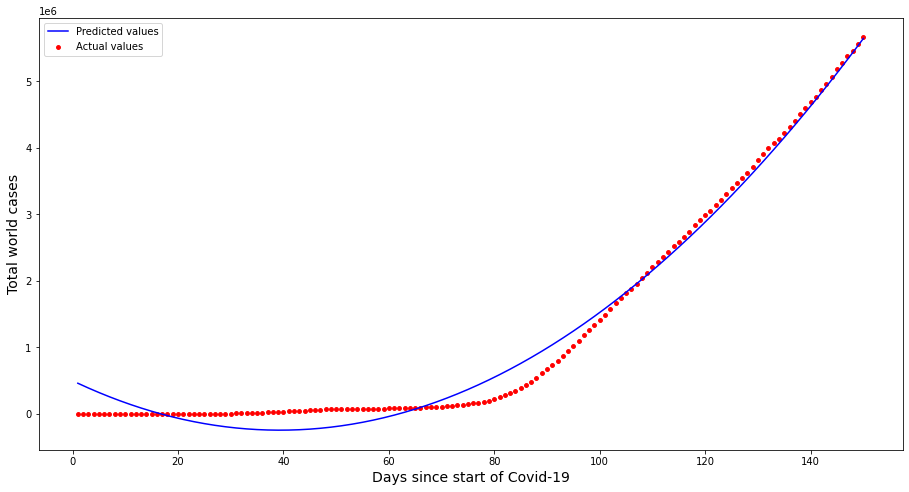

In [9]:
fig = plt.figure()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(np_array[:, 0], np_array[:, -1], color='r', s=15, label='Actual values')
ax.plot(np_array[:, 0][..., np.newaxis], predict(theta, np_array[:, 0][..., np.newaxis]), color='b', label='Predicted values')

plt.xlabel('Days since start of Covid-19', fontsize=14)
plt.ylabel('Total world cases', fontsize=14)
plt.legend(loc="upper left")

plt.show()